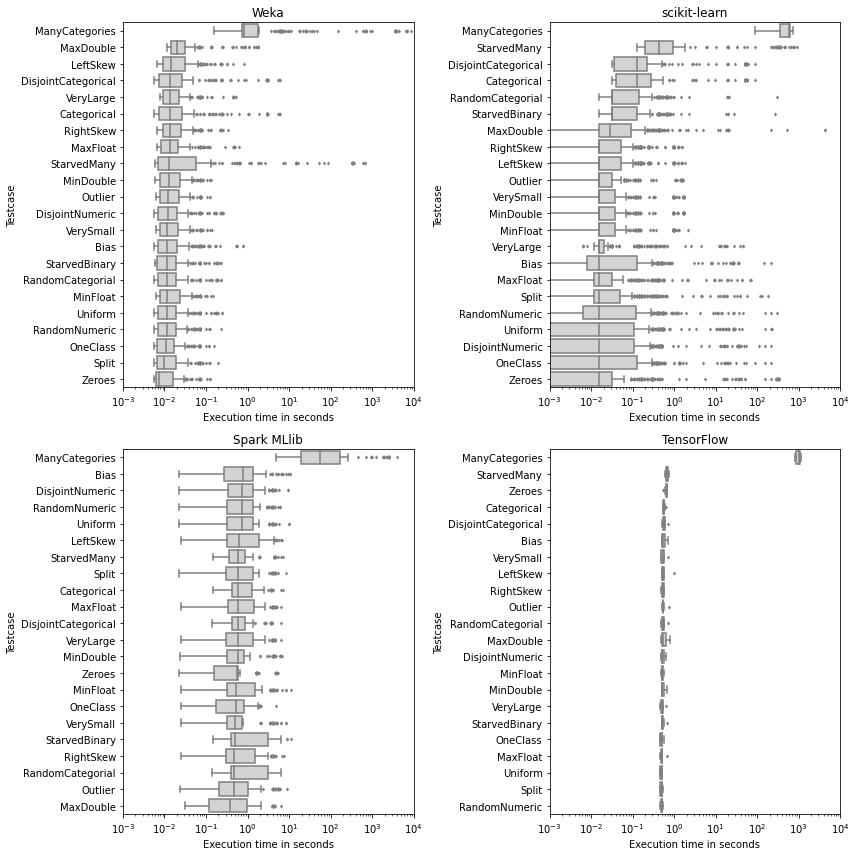

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

test_results = pd.read_csv('test_results.csv')
test_results['time'] /= 1000000

def create_boxplot(framework, ax):
    order = test_results[test_results['framework']==framework].groupby('testcase').median().sort_values('time', ascending=False).index
    
    sns.boxplot(x='time', y='testcase', data=test_results[test_results['framework']==framework], order=order, color='lightgrey', fliersize=2, ax=ax)  
    ax.set_xlim(10**(-3), 10**4)
    ax.set_xscale('log')
    ax.set_xlabel('Execution time in seconds')
    ax.set_ylabel('Testcase')
    if framework=='WEKA':
        ax.set_title('Weka')
    elif framework=='SKLEARN':
        ax.set_title('scikit-learn')
    elif framework=='SPARK':
        ax.set_title('Spark MLlib')
    elif framework=='TENSORFLOW':
        ax.set_title('TensorFlow')
    

fig, axes = plt.subplots(2,2,figsize=(12,12))
create_boxplot('WEKA', axes[0, 0])
create_boxplot('SKLEARN', axes[0, 1])
create_boxplot('SPARK', axes[1, 0])
create_boxplot('TENSORFLOW', axes[1, 1])

plt.tight_layout()
plt.savefig('boxplot_exec_times.pdf', bbox_inches='tight')

In [2]:
print("total exec time (hours):", test_results['time'].sum() / 60 / 60)
print("ManyCats exec time (hours):", test_results[test_results['testcase']=='ManyCategories']['time'].sum() / 60 / 60)
print("tests shorter than 1s: %d (%f percent)" % (sum(test_results['time']<1), sum(test_results['time']<1)/len(test_results)))
print("tests shorter than 1s: %d (%f percent)" % (sum((test_results['time']<1) & (test_results['testcase']!='ManyCategories')), sum((test_results['time']<1) & (test_results['testcase']!='ManyCategories'))/len(test_results)))
print("tests shorter than 0.1s: %d (%f percent)" % (sum(test_results['time']<0.1), sum(test_results['time']<0.1)/len(test_results)))

total exec time (hours): 92.9221771672222
ManyCats exec time (hours): 79.06912390027777
tests shorter than 1s: 19180 (0.915601 percent)
tests shorter than 1s: 18957 (0.904955 percent)
tests shorter than 0.1s: 14673 (0.700449 percent)


In [6]:
test_results[test_results['testcase']!='ManyCategories'].groupby('framework').sum()['time'] / 60 / 60

framework
SKLEARN       10.971927
SPARK          0.883810
TENSORFLOW     0.022627
WEKA           1.974689
Name: time, dtype: float64